In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FFMpegWriter
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline



def f5(y, t, N, A, eps, K):
    ypp = np.zeros(4 * N)
    
    for n1loop in range(N):
        posx = y[n1loop]
        posy = y[n1loop + N]
        momx = y[n1loop + 2 * N]
        momy = y[n1loop + 3 * N]
        
        tempcx = 0
        tempcy = 0
        
        for n2loop in range(N):
            if n2loop != n1loop:
                cposx = y[n2loop]
                cposy = y[n2loop + N]
                cmomx = y[n2loop + 2 * N]
                cmomy = y[n2loop + 3 * N]
                
                dis = np.sqrt((cposy - posy) ** 2 + (cposx - posx) ** 2 + eps ** 2)
                CFx = 0.5 * A * (posx - cposx) / dis ** 3 - 5e-5 * momx / dis ** 4
                CFy = 0.5 * A * (posy - cposy) / dis ** 3 - 5e-5 * momy / dis ** 4
                
                tempcx += CFx
                tempcy += CFy
        
        ypp[n1loop] = momx
        ypp[n1loop + N] = momy
        ypp[n1loop + 2 * N] = tempcx - K * posx
        ypp[n1loop + 3 * N] = tempcy - K * posy
    
    return ypp

def Nbody(N, L):
    A = -1
    eps = 1
    K = 0.00001

    mov_flag = 1
    if mov_flag == 1:
        moviename = 'DrawNMovie.mp4'
        writer = FFMpegWriter(fps=10)
    print("here")
    
    hh = plt.cm.jet(np.linspace(0, 1, 256))
    rie = np.random.choice(256, 256, replace=False)
    h = hh[rie]

    thet = 2 * np.pi * np.random.rand(N)
    rho = L * np.sqrt(np.random.rand(N))
    X0 = rho * np.cos(thet)
    Y0 = rho * np.sin(thet)

    Vx0 = np.zeros(N)
    Vy0 = np.zeros(N)

    y0 = np.concatenate([X0, Y0, Vx0, Vy0])

    T = 300
    xp = np.zeros(N)
    yp = np.zeros(N)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    fig.patch.set_facecolor('white')
    
    if mov_flag == 1:
        with writer.saving(fig, moviename, 100):
            KEn = []
            Upotent = []
            TotEn = []

            for tloop in range(T):
                delt = 0.005
                tspan = np.linspace(0, tloop * delt, 2)
                y = odeint(f5, y0, tspan, args=(N, A, eps, K))
                
                xpold = xp.copy()
                ypold = yp.copy()

                xp = y[-1, N:2*N]
                yp = y[-1, :N]

                crad = 2.5
                ax1.clear()
                for nloop in range(N):
                    colorval = int(64 * nloop / N)
                    circle = patches.Circle((xp[nloop], yp[nloop]), crad, color=h[colorval], fill=True)
                    ax1.add_patch(circle)
                
                ax1.set_aspect('equal', 'box')
                rnv = (2.0 + 2 * tloop / T) * L
                ax1.set_xlim(-rnv, rnv)
                ax1.set_ylim(-rnv, rnv)

                KE = np.sum(y0[2 * N:4 * N] ** 2)
                Upot = 0
                for nloop in range(N):
                    for mloop in range(nloop + 1, N):
                        dx = y0[nloop] - y0[mloop]
                        dy = y0[nloop + N] - y0[mloop + N]
                        dist = np.sqrt(dx ** 2 + dy ** 2 + eps ** 2)
                        Upot += A / dist

                Upoten = Upot
                TotE = Upoten + KE

                if tloop == 0:
                    TotE0 = TotE
                KEn.append(KE)
                Upotent.append(Upoten)
                TotEn.append(TotE)

                '''
                xx = np.arange(1, tloop + 2)
                ax2.clear()
                ax2.plot(xx, KE, label='KE', linewidth=3)
                ax2.plot(xx, Upoten, label='Upoten', linewidth=3)
                ax2.plot(xx, TotE, label='TotE', linewidth=3)
                ax2.legend()
                ax2.set_xlim(0, T)
                ax2.set_ylim(-26000, 22000)

                y0 = y[-1, :]
                
                plt.draw()
                plt.pause(0.01)
                '''

                if mov_flag == 1:
                    writer.grab_frame() 
        plt.figure()
        plt.plot(KEn, label='KE', linewidth=3)
        plt.plot(Upotent, label='Upoten', linewidth=3)
        plt.plot(TotEn, label='TotE', linewidth=3)
        plt.legend()
        plt.xlabel('Time Step')
        plt.ylabel('Energy')
        plt.title('Energy vs. Time')
        plt.grid(True)
        plt.show()


Nbody(5, 10)

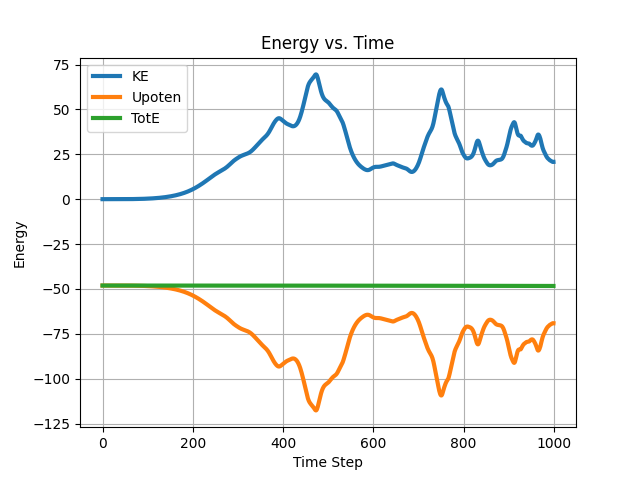

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib widget

def f5(y, t, N, A, eps, K):
    ypp = np.zeros(4 * N)
    
    for n1loop in range(N):
        posx = y[n1loop]
        posy = y[n1loop + N]
        momx = y[n1loop + 2 * N]
        momy = y[n1loop + 3 * N]
        
        tempcx = 0
        tempcy = 0
        
        for n2loop in range(N):
            if n2loop != n1loop:
                cposx = y[n2loop]
                cposy = y[n2loop + N]
                cmomx = y[n2loop + 2 * N]
                cmomy = y[n2loop + 3 * N]
                
                dis = np.sqrt((cposy - posy) ** 2 + (cposx - posx) ** 2 + eps ** 2)
                CFx = 0.5 * A * (posx - cposx) / dis ** 3 - 5e-5 * momx / dis ** 4
                CFy = 0.5 * A * (posy - cposy) / dis ** 3 - 5e-5 * momy / dis ** 4
                
                tempcx += CFx
                tempcy += CFy
        
        ypp[n1loop] = momx
        ypp[n1loop + N] = momy
        ypp[n1loop + 2 * N] = tempcx - K * posx
        ypp[n1loop + 3 * N] = tempcy - K * posy
    
    return ypp

def Nbody(N, L, T=300, delt=0.005):
    A = -1
    eps = 1
    K = 0.00001    
    # Auto-set time step if not provided
    if delt is None:
        mass_scale = 1  # Assuming unit mass for simplicity
        G = 1  # Gravitational constant (or scale factor) in your simulation
        small_fraction = 0.01  # Adjust this fraction to ensure stability
        delt = small_fraction * (L / np.sqrt(G * mass_scale * N))
        print(delt)

    thet = 2 * np.pi * np.random.rand(N)
    rho = L * np.sqrt(np.random.rand(N))
    X0 = rho * np.cos(thet)
    Y0 = rho * np.sin(thet)

    Vx0 = np.zeros(N)
    Vy0 = np.zeros(N)

    y0 = np.concatenate([X0, Y0, Vx0, Vy0])

    KEn = []
    Upotent = []
    TotEn = []

    for tloop in range(T):
        tspan = np.linspace(0, tloop * delt, 2)
        y = odeint(f5, y0, tspan, args=(N, A, eps, K))

        KE = np.sum(y[-1, 2 * N:4 * N] ** 2)

        Upot = 0
        for nloop in range(N):
            for mloop in range(nloop + 1, N):
                dx = y[-1, nloop] - y[-1, mloop]
                dy = y[-1, nloop + N] - y[-1, mloop + N]
                dist = np.sqrt(dx ** 2 + dy ** 2 + eps ** 2)
                Upot += A / dist

        Upoten = Upot
        TotE = Upoten + KE

        KEn.append(KE)
        Upotent.append(Upoten)
        TotEn.append(TotE)

        y0 = y[-1, :]

    plt.figure()
    plt.plot(KEn, label='KE', linewidth=3)
    plt.plot(Upotent, label='Upoten', linewidth=3)
    plt.plot(TotEn, label='TotE', linewidth=3)
    plt.legend()
    plt.xlabel('Time Step')
    plt.ylabel('Energy')
    plt.title('Energy vs. Time')
    plt.grid(True)
    plt.show()

# Example usage
Nbody(N=25, L=10, T=1000, delt=0.0001)
